In [1]:
import os

In [118]:
os.listdir("data")

['Submission.csv', 'test.csv', 'train.csv']

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [117]:
dataset = pd.read_csv("data/train.csv")
dataset.tail()

,timestamp,value,is_anomaly,predicted
15825,1429756073,44,False,53.624115
15826,1429756373,45,False,59.752296
15827,1429756673,48,False,52.147630
15828,1429756973,26,False,58.007545
15829,1429757273,38,False,59.144700


In [25]:
dataset.head()
dataset.describe()

,timestamp,value,predicted
count,1.583000e+04,15830.000000,15830.000000
mean,1.427383e+09,85.572205,71.870715
std,1.370962e+06,321.760918,92.450520
min,1.425009e+09,0.000000,-281.389070
25%,1.426196e+09,29.000000,32.919171
50%,1.427383e+09,47.000000,49.771124
75%,1.428570e+09,76.000000,75.948052
max,1.429757e+09,13479.000000,2716.127200


In [13]:
x = dataset["timestamp"]
value = dataset["value"]
predicted = dataset["predicted"]

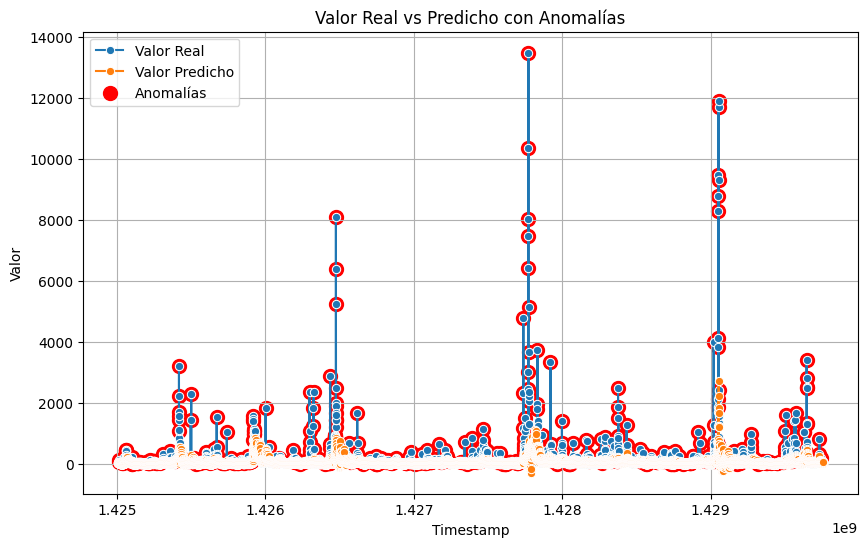

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=value, label='Valor Real', marker='o')
sns.lineplot(x=x, y=predicted, label='Valor Predicho', marker='o')

anomalies = [i for i, a in enumerate(dataset['is_anomaly']) if a]
plt.scatter([x[i] for i in anomalies], 
            [value[i] for i in anomalies], color='red', label='Anomalías', s=100)

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Valor Real vs Predicho con Anomalías')
plt.legend()
plt.grid(True)
plt.show()

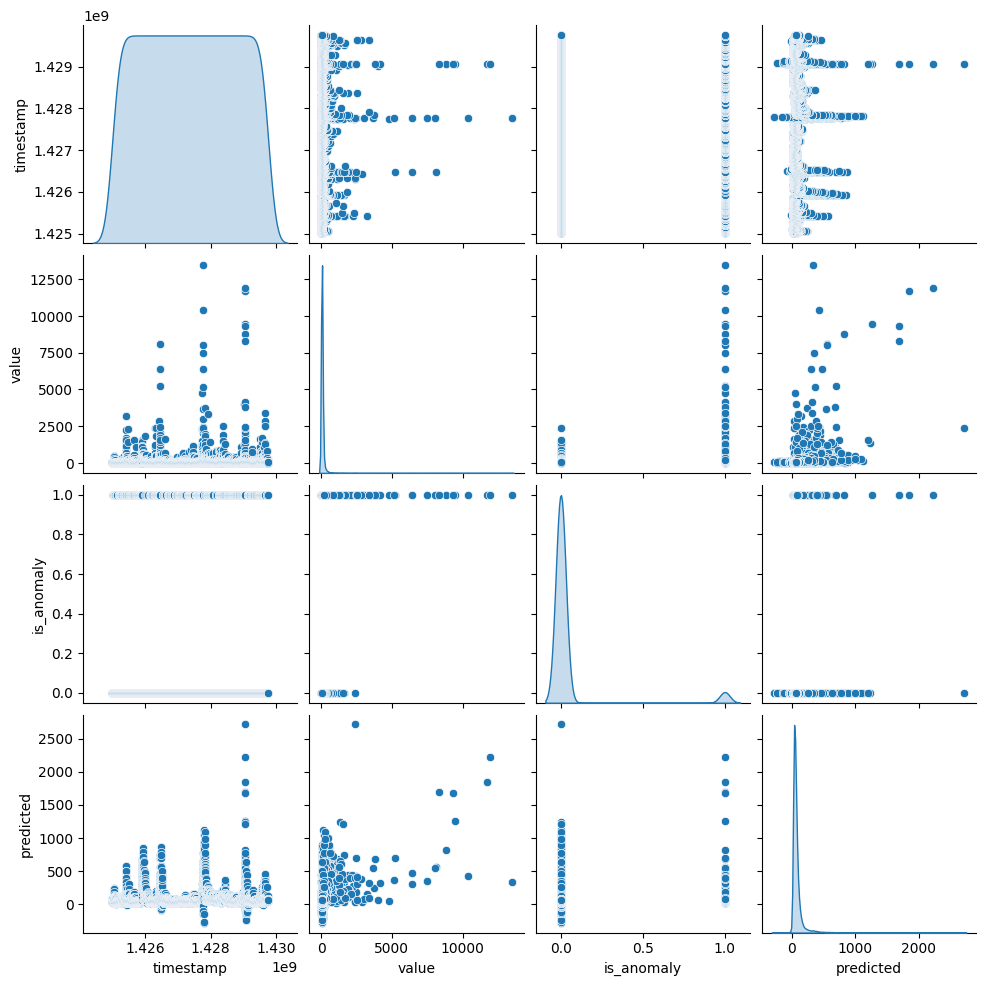

In [24]:
sns.pairplot(dataset,diag_kind="kde")

In [27]:
dataset["error"] = dataset["value"] - dataset["predicted"]

In [28]:
dataset["error"].head()

0    -2.072500
1    -9.709390
2   -40.405120
3    21.049633
4     8.649840
Name: error, dtype: float64

In [29]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], unit='s')

In [30]:
dataset['timestamp'].head()

0   2015-02-27 03:42:53
1   2015-02-27 03:47:53
2   2015-02-27 03:52:53
3   2015-02-27 03:57:53
4   2015-02-27 04:02:53
Name: timestamp, dtype: datetime64[ns]

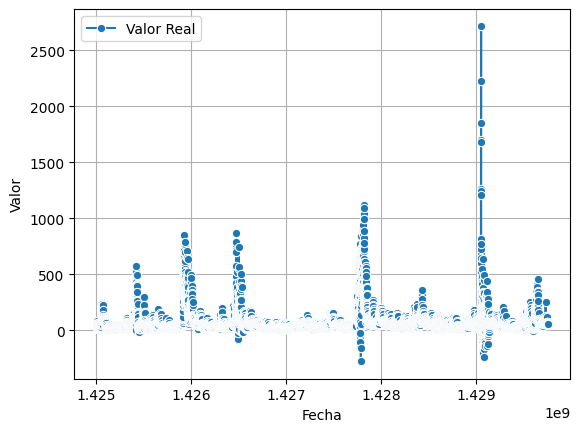

In [34]:
sns.lineplot(x=x, y=predicted, label="Valor Real", marker='o')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(dataset['value'], dataset['predicted'])
rmse = np.sqrt(mean_squared_error(dataset['value'], dataset['predicted']))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 48.216031164420095
RMSE: 292.87195977924733


In [40]:
dataset.describe()


,timestamp,value,predicted,error
count,15830,15830.000000,15830.000000,15830.000000
mean,2015-03-26 15:15:23,85.572205,71.870715,13.701490
min,2015-02-27 03:42:53,0.000000,-281.389070,-968.536300
25%,2015-03-12 21:29:08,29.000000,32.919171,-15.511730
50%,2015-03-26 15:15:23,47.000000,49.771124,-3.523468
75%,2015-04-09 09:01:38,76.000000,75.948052,10.210838
max,2015-04-23 02:47:53,13479.000000,2716.127200,13140.386100
std,NaN,321.760918,92.450520,292.560525


In [55]:
count = 0
print(len(dataset['value']))

for i in range(len(dataset['value'])):
    if dataset['value'][i] == 76:
        count += 1
count

15830


103

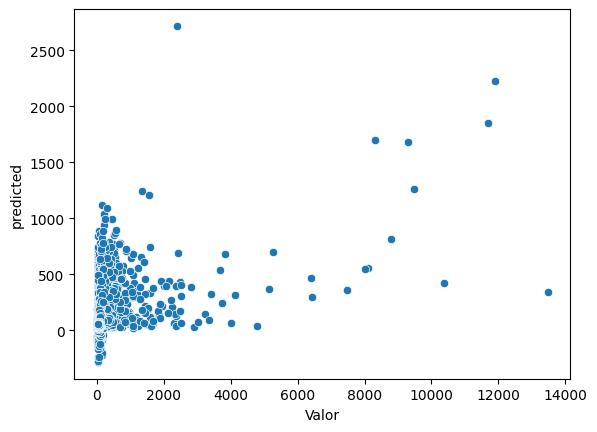

In [61]:
sns.scatterplot(x=value, y=predicted)
plt.xlabel('Valor')
plt.ylabel('predicted')
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
# https://en.wikipedia.org/wiki/Isolation_forest

In [108]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
iso_forest = IsolationForest(random_state=0)
predictions = iso_forest.fit(X_scaled)
print(len(predictions))
print(len(dataset['predicted']))
print(len(dataset['value']))
dataset['anomaly'] = predictions == -1

100
15830
15830
